In [358]:
%load_ext autoreload
%autoreload 2

import sys
import os
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

sys.path.append("JohnnyBotSimulator.")


# Dynamically determine the path to the JohnnyBotSimulator directory
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(parent_dir)

from Dynamics.JohnnyDynamics import JohnnyDynamics
from Controller.JohnnyControl import JohnnyController
from Estimation.PNT_Estimation import PNT_Estimation


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [359]:
# simple controller test 
def test_controller():
    # Set up the dynamics
    controller1 = JohnnyController()
    controller1.kp =1
    controller1.kd = 1.2
    controller1.plotter.source= [5,5]
    controller1.plotter.source_gain= 5
    controller1.simulate()
    controller1.plot()
    plt.show()
   

In [360]:
#test_controller()

In [361]:
def test_CVX_controller():
    # Set up the dynamics
    controller1 = JohnnyController()
    controller1.kp =1
    controller1.kd = 1.2
    controller1.desired_state = jnp.array([0,0,0,0])
    controller1.state0 = jnp.array([10,10,.7,-.7])
    controller1.plotter.source= [10,0]
    controller1.plotter.source_gain= 5
    controller1.CVX_controller_double_integrator()
    controller1.plot()
    plt.show()

In [362]:
#test_CVX_controller()

In [363]:
def test_CVX_controller_Obstacles():
    # Set up the dynamics
    controller1 = JohnnyController()
    controller1.kp =1
    controller1.kd = 1.2
    controller1.desired_state = jnp.array([0,0,0,0])
    controller1.state0 = jnp.array([10,10,.5,0])
    controller1.plotter.source= [10,0]
    controller1.plotter.source_gain= 5
    controller1.plotter.obstacles = [[5,5, 0]]
    controller1.plotter.obstacles_bool = True
    controller1.CVX_controller_double_integrator_boundary_constraint()
    controller1.plot()
    plt.show()

Optimization successful!
Optimal cost: 192629.13901031148
plotting


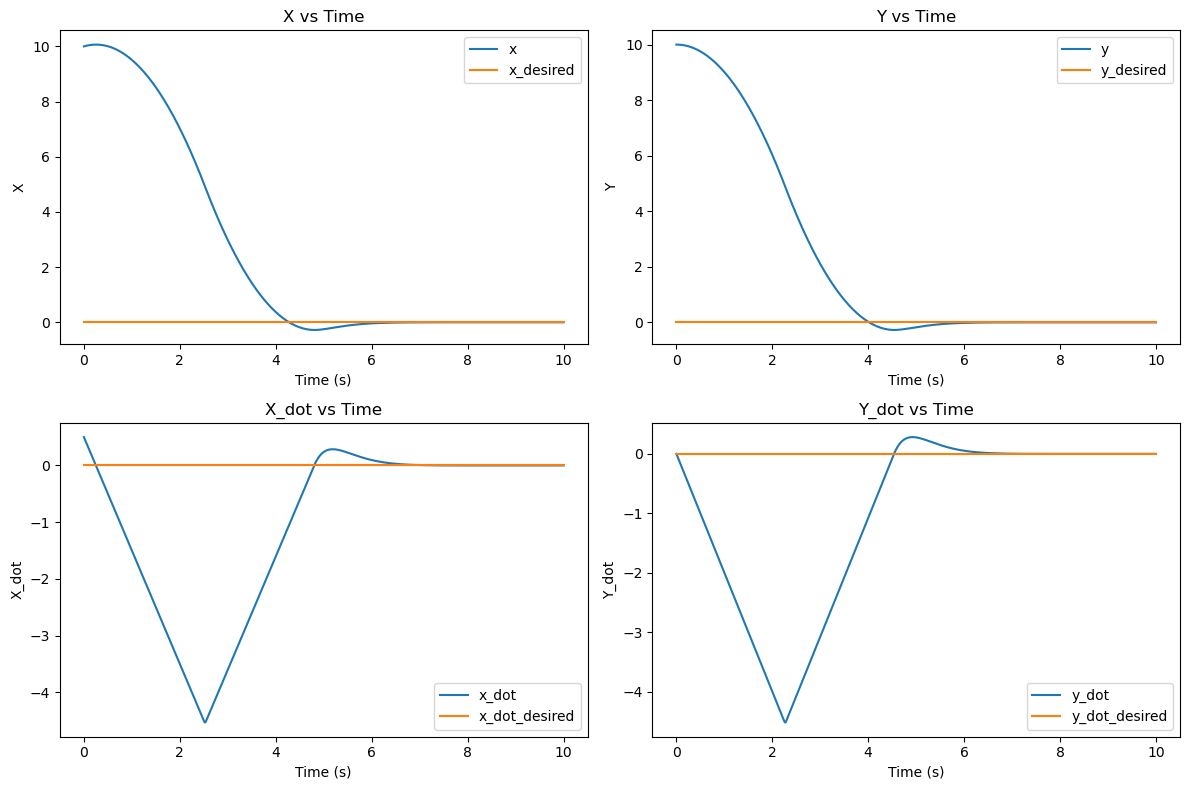

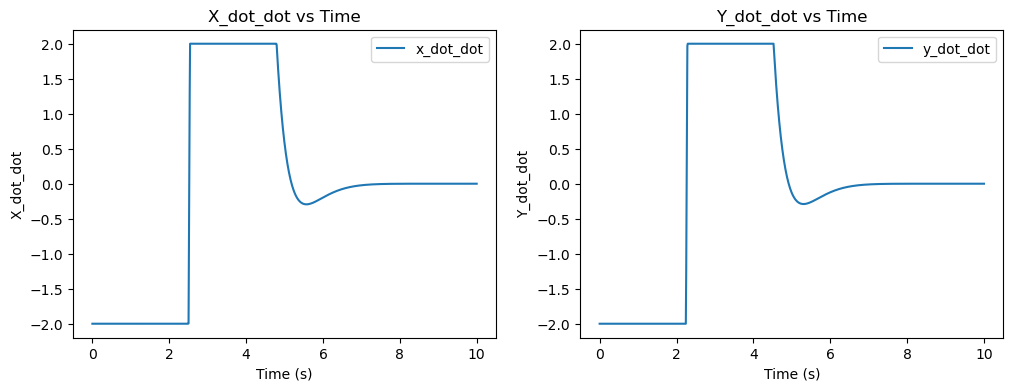

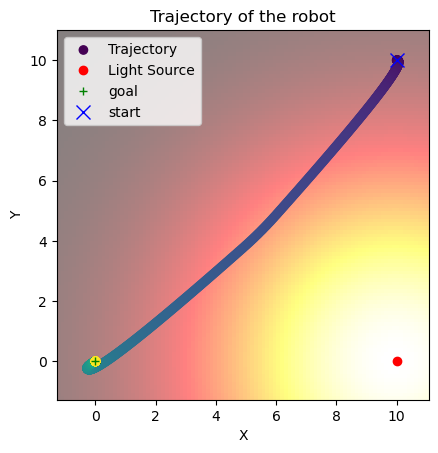

In [364]:
test_CVX_controller_Obstacles()

In [365]:
def test_CVX_MPC():
    # Set up the dynamics
    controller1 = JohnnyController()
    controller1.kp =1
    controller1.kd = 1.2
    controller1.desired_state = jnp.array([0,0,0,0])
    controller1.state0 = jnp.array([10,10,.7,-.7])
    controller1.plotter.source= [10,0]
    controller1.plotter.source_gain= 5
    controller1.CVX_controller_MPC()
    controller1.plot()
    plt.show()

[10.  10.   0.7 -0.7]
Step 0: Optimization successful!
Optimal cost: 11986.514814523094
[10.007       9.993       0.67999999 -0.71999999]
Step 1: Optimization successful!
Optimal cost: 11980.324001122166
[10.01379914  9.98580083  0.66000306 -0.73999698]
Step 2: Optimization successful!
Optimal cost: 11973.715492065949
[10.02039834  9.97840172  0.64000614 -0.75999397]
Step 3: Optimization successful!
Optimal cost: 11966.688552448182
[10.02679759  9.97080266  0.62000922 -0.77999096]
Step 4: Optimization successful!
Optimal cost: 11959.243566133613
[10.0329969   9.96300365  0.60001229 -0.79998795]
Step 5: Optimization successful!
Optimal cost: 11951.380767090355
[10.03899627  9.9550047   0.58001537 -0.81998495]
Step 6: Optimization successful!
Optimal cost: 11943.100686039397
[10.04479569  9.9468058   0.56001844 -0.83998194]
Step 7: Optimization successful!
Optimal cost: 11934.403858156491
[10.05039516  9.93840695  0.54002152 -0.85997894]
Step 8: Optimization successful!
Optimal cost: 119

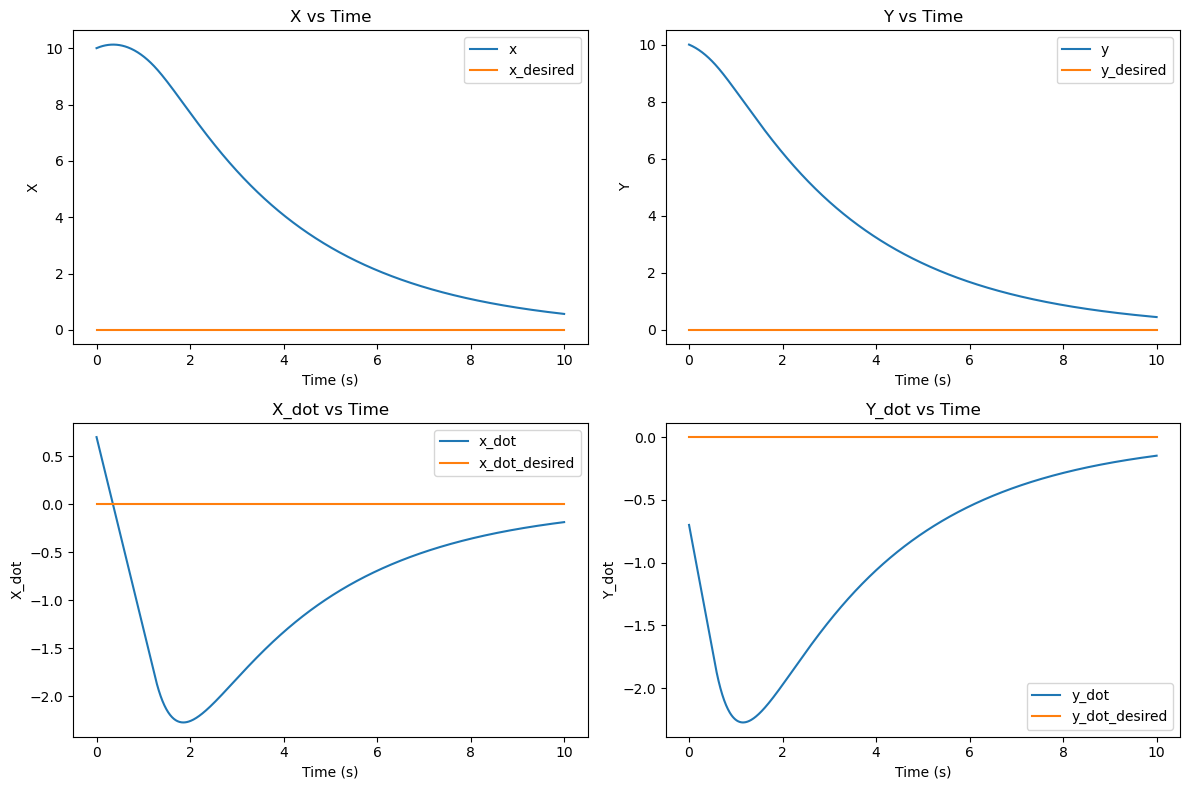

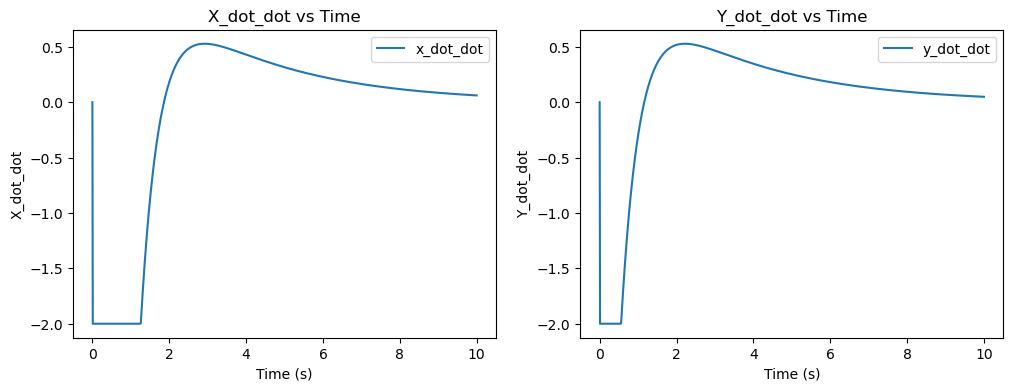

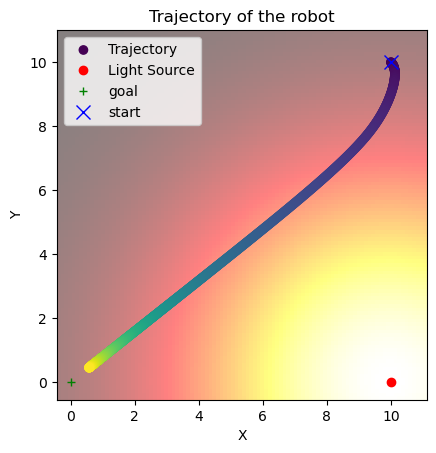

In [366]:
test_CVX_MPC()